In [3]:
# @title Imports

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [4]:
# @title Carregar dados

from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = '/content/drive/Shareddrives/AM/ml-100k/'


ratings = pd.read_csv(DATASET_PATH + 'u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv(DATASET_PATH + 'u.item', sep='|', encoding='latin-1', header=None,
                     names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
users = pd.read_csv(DATASET_PATH + 'u.user', sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

Mounted at /content/drive


In [5]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [6]:
movies.head(10)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
print(f"Ratings shape: {ratings.shape}")
print(f"Movies shape: {movies.shape}")
print(f"Users shape: {users.shape}")

Ratings shape: (100000, 4)
Movies shape: (1682, 24)
Users shape: (943, 5)


In [9]:
# @title Divisão treino/teste

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

In [10]:
n_users = ratings['user_id'].max()
n_movies = ratings['movie_id'].max()
train_matrix = np.zeros((n_users, n_movies))
for row in train.itertuples():
    train_matrix[row.user_id-1, row.movie_id-1] = row.rating

In [11]:
print(train_matrix)

[[0. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [12]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (80000, 4), Test shape: (20000, 4)


In [13]:
# @title Matriz utilidade (apenas treino!)

utility_matrix = train.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

In [14]:
utility_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1670,1671,1672,1673,1676,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print(f"Utility matrix shape: {utility_matrix.shape}")

Utility matrix shape: (943, 1653)


In [16]:
# @title Extração dos recursos de gênero dos filmes
movie_features = movies.iloc[:, 5:].values

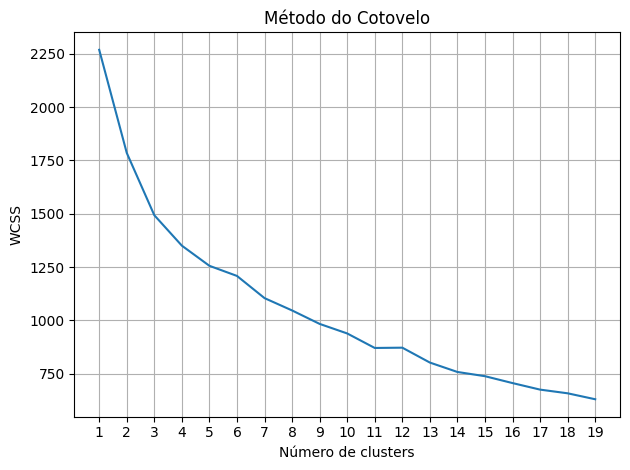

In [17]:
# @title Determinação ótima de K usando WCSS
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(movie_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.xticks(range(1, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

O melhor WCSS (Within-Cluster Sum of Squares) não é o menor possível, mas sim aquele que representa o “cotovelo” da curva, ou seja, o ponto onde a redução no WCSS deixa de ser significativa ao aumentar o número de clusters.

In [18]:
# @title Clusterização dos filmes (apenas gêneros)

K = 2

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
movies['cluster'] = kmeans.fit_predict(movie_features)

In [19]:
# @title Matriz utilidade clusterizada (usuário x cluster)

clustered_utility = pd.DataFrame(index=utility_matrix.index, columns=range(K))

for user in utility_matrix.index:
    for cluster in range(K):

        cluster_movies = movies[movies['cluster'] == cluster]['movie_id']
        ratings_in_cluster = utility_matrix.loc[user, utility_matrix.columns.intersection(cluster_movies)]
        mean_rating = ratings_in_cluster[ratings_in_cluster > 0].mean() if (ratings_in_cluster > 0).any() else 0
        clustered_utility.loc[user, cluster] = mean_rating

clustered_utility = clustered_utility.fillna(0)

<ipython-input-19-a1521b9798d0>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clustered_utility = clustered_utility.fillna(0)


In [20]:
clustered_utility

,0,1
user_id,,
1,4.023529,3.455285
2,4.038462,3.500000
3,3.000000,2.625000
4,4.800000,4.400000
5,2.842105,2.865546
...,...,...
939,4.833333,4.095238
940,3.575000,3.306122
941,4.333333,4.214286


In [21]:
# @title Normalização avançada
means = clustered_utility.mean(axis=1)
stds = clustered_utility.std(axis=1).replace(0, 1)
clustered_utility_norm = (clustered_utility.sub(means, axis=0)).div(stds, axis=0).fillna(0)

In [22]:
clustered_utility_norm

,0,1
user_id,,
1,0.707107,-0.707107
2,0.707107,-0.707107
3,0.707107,-0.707107
4,0.707107,-0.707107
5,-0.707107,0.707107
...,...,...
939,0.707107,-0.707107
940,0.707107,-0.707107
941,0.707107,-0.707107


In [23]:
# @title Similaridade de usuários (Pearson)

user_similarity = pd.DataFrame(index=clustered_utility.index, columns=clustered_utility.index)

for u1 in clustered_utility.index:
    for u2 in clustered_utility.index:
        if u1 == u2:
            user_similarity.loc[u1, u2] = 1
        else:
            sim, _ = pearsonr(clustered_utility.loc[u1], clustered_utility.loc[u2])
            user_similarity.loc[u1, u2] = sim if not np.isnan(sim) else 0

user_similarity = user_similarity.astype(float)

<ipython-input-23-4396b3a2e9fc>:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sim, _ = pearsonr(clustered_utility.loc[u1], clustered_utility.loc[u2])


In [24]:
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
940,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
941,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# @title Função de predição

def guess(user_id, movie_id, topN=5):
    # Se o usuário não está na base de treino, retorna média global
    if user_id not in utility_matrix.index:
        return train['rating'].mean()

    # Se o filme não está na base de treino, retorna média do usuário
    if movie_id not in utility_matrix.columns:
        return utility_matrix.loc[user_id][utility_matrix.loc[user_id] > 0].mean()

    sims = user_similarity.loc[user_id].sort_values(ascending=False)[1:topN+1]

    ratings = []
    weights = []

    for neighbor in sims.index:
        if movie_id in utility_matrix.columns:
            rating = utility_matrix.loc[neighbor, movie_id]
            if rating > 0:
                ratings.append(rating)
                weights.append(sims[neighbor])

    if not ratings or sum(weights) <= 0:
        user_avg = utility_matrix.loc[user_id][utility_matrix.loc[user_id] > 0].mean()
        return user_avg if not np.isnan(user_avg) else train['rating'].mean()

    return np.average(ratings, weights=weights)

In [26]:
# @title Exemplo de recomendação

user_id_exemplo = 10
print(f"\nTop 5 filmes recomendados para o usuário {user_id_exemplo}:")

movie_ids = utility_matrix.columns
predicoes = [(mid, guess(user_id_exemplo, mid)) for mid in movie_ids if utility_matrix.loc[user_id_exemplo, mid] == 0]
predicoes.sort(key=lambda x: x[1], reverse=True)

for mid, score in predicoes[:5]:
    title = movies[movies['movie_id'] == mid]['movie_title'].values[0]
    print(f"{title}: {score:.2f}")


Top 5 filmes recomendados para o usuário 10:
Usual Suspects, The (1995): 5.00
Mr. Holland's Opus (1995): 5.00
Antonia's Line (1995): 5.00
Crimson Tide (1995): 5.00
Clerks (1994): 5.00


In [27]:
# @title Avaliação no conjunto de teste

y_true = []
y_pred = []

for _, row in test.iterrows():
    user = row['user_id']
    movie = row['movie_id']
    true_rating = row['rating']
    pred_rating = guess(user, movie, topN=5)
    y_true.append(true_rating)
    y_pred.append(pred_rating)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse:.6f}')

RMSE: 1.180143
